In [2]:
import fastai
from fastai.vision.all import *


In [6]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


C:\Users\gurjo\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gurjo\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,5.414329,2.684663,00:29


epoch,train_loss,valid_loss,time
0,2.058925,1.420312,00:29
1,1.644060,1.824055,00:28
2,1.524662,1.225762,00:29
3,1.390998,1.088264,00:29
4,1.258042,0.920499,00:28
5,1.137929,0.820020,00:28
6,1.036798,0.781368,00:28
7,0.957417,0.777227,00:29


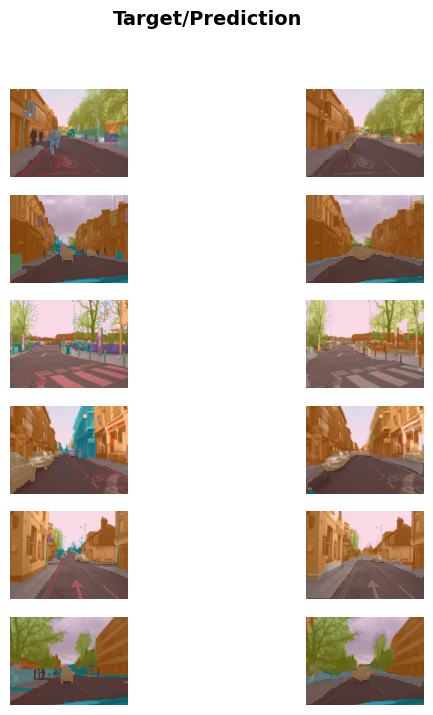

In [7]:
learn.show_results(max_n=6, figsize=(7,8))

TABULAR INPUT: We dont do the fine tuning here, we do fit_one_cycle to train a model from scratch

In [8]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [9]:
learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.388369,0.362785,0.833231,00:05
1,0.362705,0.351406,0.837838,00:04
2,0.349552,0.346842,0.840602,00:04


In [10]:
################################

Validation Sets and Test Sets

To put it bluntly, if you're a senior decision maker in your organization (or you're advising senior decision makers), the most important takeaway is this: if you ensure that you really understand what test and validation sets are and why they're important, then you'll avoid the single biggest source of failures we've seen when organizations decide to use AI. For instance, if you're considering bringing in an external vendor or service, make sure that you hold out some test data that the vendor never gets to see. Then you check their model on your test data, using a metric that you choose based on what actually matters to you in practice, and you decide what level of performance is adequate. (It's also a good idea for you to try out some simple baseline yourself, so you know what a really simple model can achieve. Often it'll turn out that your simple model performs just as well as one produced by an external "expert"!)

In [1]:
#############

# MNIST BASICS

In [15]:
import fastai
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

In [16]:
Path.BASE_PATH = path

In [17]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [18]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [19]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
number_of_sevens = len(sevens)
print(number_of_sevens)
teen_kitne = len(threes)
print(teen_kitne)

6265
6131


In [20]:
im7_path = sevens[6264]
im7 = Image.open(im7_path) # Image class used from PIL
im7

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance, here's what a section of the image looks like, converted to a NumPy array:

In [21]:
tensor(im7)[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 9]], dtype=torch.uint8)

In [22]:
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[5:27, 4:27])
df.style.set_properties(**{'front-size':'8pt'}).background_gradient('Greys')



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,11,65,76,133,202,253,253,253,124,0,0,0,0,0,0
3,0,0,0,0,0,0,0,61,237,252,252,253,250,211,135,252,187,5,0,0,0,0,0
4,0,0,0,0,0,9,128,234,252,252,252,228,87,0,49,252,252,48,0,0,0,0,0
5,0,0,0,0,0,141,252,252,252,252,206,40,0,0,129,252,204,16,0,0,0,0,0
6,0,0,0,0,24,215,252,252,229,83,4,0,0,9,189,238,80,0,0,0,0,0,0
7,0,0,0,0,0,146,252,153,37,0,0,0,7,156,252,192,0,0,0,0,0,0,0
8,0,0,0,0,0,12,48,9,0,0,0,0,25,252,252,151,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,51,169,252,164,10,0,0,0,0,0,0,0


#Let's create a tensor containing all of our 3s stacked together. We already know how to create a tensor containing a single image. To create a tensor containing all the images in a directory, we will first use a Python list comprehension to create a plain list of the single image tensors.

In [23]:
import fastai
from fastai.vision.all import *

seven_tensors = [tensor(Image.open(q)) for q in sevens] #list comprehension
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

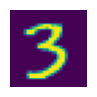

In [24]:
show_image(three_tensors[1])

In [25]:
#using the stack function is pyTorch
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [26]:
len(stacked_threes.shape) # rank of the tensor

3

In [27]:
stacked_threes.ndim# tensor's rank

3

<Axes: >

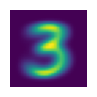

In [28]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

stacked_threes: This tensor likely contains a collection of images, where each image is represented as a separate tensor. These images are stacked along a new dimension (dimension 0), resulting in a tensor where each element along dimension 0 corresponds to an image.

mean3 = stacked_threes.mean(0): This line calculates the mean of these images along dimension 0. In other words, it computes the element-wise mean of all the images in the stacked_threes tensor, resulting in a single tensor that represents the mean image.

mean3 is the tensor representing the mean image.
The mean(0) operation computes the mean along the first dimension (dimension 0), effectively averaging pixel values across all the images in the collection to produce the mean image.
show_image(mean3): After calculating the mean image, this line displays the mean image using a function called show_image. This function is likely used to visualize the tensor as an image.

The show_image function takes the mean3 tensor as input and displays it as an image.
The result of this code is that you'll see the mean image of all the "3" images contained in the stacked_threes tensor. This can be a useful visualization because it shows you a representation of what a "typical" or "average" handwritten digit "3" looks like based on the dataset you have.







<Axes: >

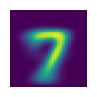

In [32]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

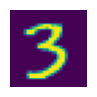

In [42]:
a_3 = stacked_threes[1]
show_image(a_3)

In [43]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [44]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)*2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.2360))

In [45]:
import torch
import torch.nn.functional as F

In [46]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()


(tensor(0.1586), tensor(0.3021))

# Array / Tensor techniques 

In [47]:
#creating a tensor
data = [[1,2,3], [4,5,6]]
arr = array(data)
tns = tensor(data)

In [48]:
arr #numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [49]:
tns #pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [50]:
tns[1]

tensor([4, 5, 6])

In [51]:
tns[:,1]

tensor([2, 5])

In [52]:
tns[1,1:3]

tensor([5, 6])

In [53]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [54]:
tns.type()

'torch.LongTensor'

In [55]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])